## Data Wrangling 
<br/>
<b> Submission: </b>  
Create a short document (1-2 pages) in your github describing the data wrangling steps that you undertook to clean your capstone project data set. 
- What kind of cleaning steps did you perform?   
- How did you deal with missing values, if any?   
- Were there outliers, and how did you decide to handle them?   

This document will eventually become part of your milestone report.

## Capstone Project 1: IR spectral analysis of organic compounds via a machine learning approach

***
<b> Table of contents </b>   
&nbsp;&nbsp; I.   Data overview  
&nbsp;&nbsp; II.   Data cleaning   
&nbsp;&nbsp; III.  Data treatment  
&nbsp;&nbsp; IV. Data analysis  
&nbsp;&nbsp; V. Conclusions

****
### I. Data overview

****
<b> 1) Project scope: </b>    
IR spectroscopy is a versatile and a precise method for chemical identification because every compound exhibits unique IR spectral features; however, the spectral features tend to be ambiguous. A manual interpretation is often time-consuming and may lead to inconsistent, erroneous results. Hence, there is a need for a rapid, accurate, and reproducible alternative to a manual interpretation. 

The purpose of this program is to automate the IR spectrum interpretation routine of an unknown compound with the aid of the IR spectra database of over 40,000 known compounds available in the NIST database (http://webbook.nist.gov/chemistry/vib-ser/). The <b>goal</b> of this work is to come up with an accurate and reproducible 'guessing' algorithms.

<b> 2) Current endeavor </b>  
NIST chemistry webbook (http://webbook.nist.gov/chemistry/download/) lists over 40,000 known compounds. The webbook consists of three columns:
  - Name: chemical name  
  - Formula: chemical formula  
  - CAS: a unique identification number (https://support.cas.org/content/chemical-substances/faqs#zero) 

As a starting point, I am taking this chemicals list and cut down the number of entries to yield the compounds that are relevant to this project. 

### II. Data cleaning

<b> 1) Remove all entries with null values and remove duplicates </b>  
- Below provides an overview of the chemicals list.    

In [1]:
import pandas as pd
df=pd.read_csv('data/NIST_chemicals_list.csv', header=0, names=['Name','Formula','CAS'])
df.info() #check
df.head() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72618 entries, 0 to 72617
Data columns (total 3 columns):
Name       72456 non-null object
Formula    70767 non-null object
CAS        44657 non-null object
dtypes: object(3)
memory usage: 1.7+ MB


,Name,Formula,CAS
0,Electron,e-,NaN
1,Iron(2) oxide anion,FeO-,NaN
2,AsF3..Cl anion,AsClF3-,NaN
3,AgH2-,H2Ag-,NaN
4,HAg(H2),H3Ag,NaN


It is seen that the list consists of 72,618 entries. Certainly, this number is only a fraction of all compounds that have assigned CAS number. According to the chemical abstracts service, the registry currently (January 28th, 2018) has 67,483,385 sequences (https://support.cas.org/content/counter).

Since all three columns are essential, the first step is to remove rows entries that contain null values in any of the columns.

In [2]:
df.dropna(inplace=True) #remove rows that cotain null values in any of the columns
df.info() #assess data types and number of entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44455 entries, 10613 to 55269
Data columns (total 3 columns):
Name       44455 non-null object
Formula    44455 non-null object
CAS        44455 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


<b> 2) Check for duplicates in the CAS column </b>  
-Since there are no duplicates, set the unique CAS number as the index column

In [3]:
no_unique_cas=len(set(df.CAS))
no_cas_entries=len(df.CAS)                  

print('\n')
print('Number of unique CAS:', len(set(df.CAS))) 
print('Number of CAS entries:', len(df.CAS))

if no_unique_cas==no_cas_entries:
    print('There are no duplicates')
else:
    print('There are no duplicates')
                  
df=df.set_index('CAS') #since there are no duplicates, set the unique CAS number as the index column
df.head()



Number of unique CAS: 44455
Number of CAS entries: 44455
There are no duplicates


,Name,Formula
CAS,,
100-00-5,"Benzene, 1-chloro-4-nitro-",C6H4ClNO2
100-01-6,p-Nitroaniline,C6H6N2O2
100-02-7,"Phenol, 4-nitro-",C6H5NO3
100043-29-6,2H-Tetrazole,CH2N4
100046-00-2,"2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide",C18H22N2O2


<b> 3) Check for chemical names duplicates </b>  
-There are indeed duplicate names, but occasionally with a different chemical formula. In the exceptional case, a more precise naming and/or chemical formula is required. 

For instance, the name Tungsten bromide occurs twice with assigned chemical formulae BrW (CAS:74966-78-2) and Br6W (CAS:13701-86-5), respectively. In this case, the one with CAS:13701-86-5 should be more precisely named Tungsten(VI) Bromide to differentiate with the other duplicate.  

-As a second example, the entries with duplicate names have exactly the same chemical formula. 

For instance, the compound named 1,4:5,8-Dimethanonaphthalene, decahydro-9-methyoxy-, stereoisomer with a chemical formula C12H18O is listed as four different CAS numbers: 36197-17-8, 36197-16-7, 82189-44-4, and 82161-26-0. 

In this case, the name generally specifies that this compound occurs as a stereoisomer.

-As a third example, D-Glucose with a chemical formula C6H12O6 is listed twice as two different CAS numbers, 26655-34-5 and 492-62-6.

-Nonetheless, the analysis of chemical compounds via FTIR spectroscopy, the precise chemical names or chemical formulae are not required.  

-Some explanations/discussions pertaining to this issue can be found here:    
- https://en.wikipedia.org/wiki/CAS_Registry_Number  
- http://www.chemspider.com/blog/cas-registry-numbers-and-how-confused-we-are.html
- https://www.researchgate.net/post/Why_do_some_chemicals_have_multiple_Chemical_Abstracts_Service_CAS_numbers

In [4]:
#Get entries with duplicated names
df[df.Name.duplicated(keep=False)].sort_values('Name').head()

,Name,Formula
CAS,,
26655-34-5,&#945;-D-Glucose,C6H12O6
492-62-6,&#945;-D-Glucose,C6H12O6
10639-26-6,&#945;-Lactose monohydrate,C12H22O11.H2O
5989-81-1,&#945;-Lactose monohydrate,C12H22O11.H2O
10208-80-7,&#945;-Muurolene,C15H24


Note that the symbolic characters such as '&\#945;' in '&\#945;-D-Glucose' is a hexadecimal character for symbols and Greek letters. In this case, '&\#945;' is '&#945;'. 

In [5]:
#No. of unique values from these duplicates
len(set(df.Name[df.Name.duplicated(keep=False)]))

229

Hence, there are 229 species with duplicate names, but unique CAS number.

<b> 4) Inspect for isomers </b>  
-Assuming that each entry is unique (https://en.wikipedia.org/wiki/CAS_Registry_Number, http://support.cas.org/content/chemical-substances), compounds that have the same chemical formula, but different chemical structures, hence different chemical names are referred to as <b>isomers</b> (https://en.wikipedia.org/wiki/Isomer).  

Nonetheless, we have seen in section <b> 3a </b> that some of these isomers (i.e., 1,4:5,8-Dimethanonaphthalene, decahydro-9-methyoxy-, stereoisomer) are ambiguously referred to the same names with added adjective, stereoisomer.  

Furthermore, some of these entries are pure elements (e.g., Tellurium, Te, with CAS numbers 22541-49-7 and 13494-80-9). In this case, duplicated entries may, but not necessarily refer to different <b>allotropes</b> (https://en.wikipedia.org/wiki/Allotropy). 

-It is also seen that some of the entries are not assigned with the proper chemical formula (e.g., CAS numbers: 26700-39-0,
25988-63-0, 61257-62-3, 26982-20-7, and 61857-39-4)


In [6]:
#Get entries with duplicated chemical formulae
df[df.Formula.duplicated(keep=False)].sort_values('Formula').head()

,Name,Formula
CAS,,
26700-39-0,Poly-L-lysine hydrobromide&middot;phenylalanin...,()n
25988-63-0,Poly-L-lysine hydrobromide,()n
61257-62-3,Poly-L-lysine hydrobromide&middot;alanine copo...,()n
26982-20-7,Poly-L-arginine hydrochloride,()n
61857-39-4,Poly-L-histidine hydrochloride,()n


In [7]:
#No. of unique values from these duplicates
len(set(df.Formula[df.Formula.duplicated(keep=False)]))

5251

Hence, there are 5,251 species with duplicated formula (i.e., 5,251 compounds having <b>isomers</b>, <b>allotropes</b>, and possibly different purities).

<b> 5) Retain compounds that contain organic elements </b>  
Due to the overwhelming amount of information, the current interest is to assess a certain classes of organic compounds that contain the following elements: C, H, O, N, S, P, F, Cl, Br, and I. By eliminating the rest of the compounds, but those that contain these elements we will eliminate some of the ambiguities that we encountered above. 

To cut down the number of entries to just those that contain the elements listed above, the steps are as follows:

&nbsp;&nbsp; i) Generate a dictionary of periodic table of elements  
&nbsp;&nbsp; ii) Get unique elements present in each compound  
&nbsp;&nbsp; iii) Remove compounds that contain inorganic elements

<b> i) Using NIST periodic table of elements, generate a dictionary of periodic table of elements </b>  
-Notice that there are 120 elements instead of 118. The two additional elements are the hydrogen isotopes (i.e., D and T)

In [8]:
import common as common
# 1-1a. Call out function

file_name = 'data/NIST_periodic_table.txt'
periodic_table = common.create_periodic_table(file_name)

# 1-1b.Test out dictionary by calling out the element keys
print(list(periodic_table.keys()))
print("\n")
print("Number of dictinct elements in the dictionary:", len(periodic_table))

['H', 'D', 'T', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']


Number of dictinct elements in the dictionary: 120


![periodic_table](data/Periodic_Table_wiki.png)


<b> (ii) Get unique elements present in the compound </b>

In [9]:
df_el=common.extract_unique_elements(df)
df_el.head()

,Name,Formula,Elements
CAS,,,
100-00-5,"Benzene, 1-chloro-4-nitro-",C6H4ClNO2,"[C, H, Cl, N, O]"
100-01-6,p-Nitroaniline,C6H6N2O2,"[C, H, N, O]"
100-02-7,"Phenol, 4-nitro-",C6H5NO3,"[C, H, N, O]"
100043-29-6,2H-Tetrazole,CH2N4,"[C, H, N]"
100046-00-2,"2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide",C18H22N2O2,"[C, H, N, O]"


In [10]:
df_el.count()

Name        44455
Formula     44455
Elements    44455
dtype: int64

<b> (iii) Extract only compounds that contain any of the following C, H ,O ,N, S, P, F, Cl, Br, and I elements and store into a new df</b>

In [11]:
#specify elements in the elements list
#NOTE: need to make the code more efficient by avoiding the use of a for loop

elements_list=['C','H','O','N','S','P','F','Cl','Br','I'] #specify the list of elements
df_el_filt=common.shorten_df_by_elements_list(df_el, elements_list,'any') #Filter compounds by specifying list of acceptable elements

Work in progress. Please wait...
Work is completed. 


In [12]:
df_el_filt.head() #check

,Name,Formula,Elements
CAS,,,
100-00-5,"Benzene, 1-chloro-4-nitro-",C6H4ClNO2,"[C, H, Cl, N, O]"
100-01-6,p-Nitroaniline,C6H6N2O2,"[C, H, N, O]"
100-02-7,"Phenol, 4-nitro-",C6H5NO3,"[C, H, N, O]"
100043-29-6,2H-Tetrazole,CH2N4,"[C, H, N]"
100046-00-2,"2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide",C18H22N2O2,"[C, H, N, O]"


<b> 6) Generate a new column containing the molecular weight of each compound </b>

(i) Calculate molecular weight and add to a new column

In [13]:
#calculate molecular weight
df_el_filt_mw=common.calc_molec_weight(df_el_filt,periodic_table)
df_el_filt_mw.head() #check

,Name,Formula,Elements,Mw
CAS,,,,
100-00-5,"Benzene, 1-chloro-4-nitro-",C6H4ClNO2,"[C, H, Cl, N, O]",156.993056
100-01-6,p-Nitroaniline,C6H6N2O2,"[C, H, N, O]",138.042927
100-02-7,"Phenol, 4-nitro-",C6H5NO3,"[C, H, N, O]",139.026943
100043-29-6,2H-Tetrazole,CH2N4,"[C, H, N]",70.027946
100046-00-2,"2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide",C18H22N2O2,"[C, H, N, O]",298.168128


(ii) Inspect Mw distribution

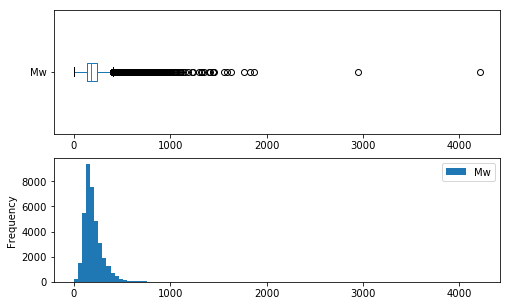

In [14]:
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(nrows=2, figsize=(8,5))

df_el_filt_mw.plot(kind='box', ax=ax, vert=False)
df_el_filt_mw.plot(kind='hist',bins=100, ax=ax2)

plt.show()

In [15]:
df_el_filt_mw.describe()

,Mw
count,37159.000000
mean,201.577782
std,107.026227
min,0.000000
25%,136.125201
50%,179.094629
75%,241.922361
max,4214.114381


(ii) The Mw distribution looks suspicious (i.e., the minimum molecular weight is 0 and two of the compounds have molecular weights that are above 2000). Further inspection is needed. 

In [16]:
df_el_filt_mw[df_el_filt_mw.Mw<=50].sort_values('Mw').head(10)

,Name,Formula,Elements,Mw
CAS,,,,
61257-62-3,Poly-L-lysine hydrobromide&middot;alanine copo...,(,[],0.000000
61857-39-4,Poly-L-histidine hydrochloride,(,[],0.000000
26982-20-7,Poly-L-arginine hydrochloride,(,[],0.000000
26700-39-0,Poly-L-lysine hydrobromide&middot;phenylalanin...,(,[],0.000000
25988-63-0,Poly-L-lysine hydrobromide,(,[],0.000000
12408-02-5,Hydrogen cation,H+,[H],1.007825
12385-13-6,Hydrogen atom,H,[H],1.007825
12184-88-2,Hydrogen anion,H-,[H],1.007825
1333-74-0,Hydrogen,H2,[H],2.015650


In [17]:
df_el_filt_mw[df_el_filt_mw.Mw>=600].sort_values('Mw').tail(10)
#It is seen that there are pure elements compounds, which are in gaseous state at ambient condition, except for 'C'.
#Thus, the next step is to eliminate all of the pure elements compounds, except for 'C'

,Name,Formula,Elements,Mw
CAS,,,,
500016-91-1,"28,28-diethyl-23,33-didocosyltetrapentacontane",C103H208,"[C, H]",1445.627607
3810-74-0,Streptomycin sulfate,C42H84N14O36S3,"[C, H, N, O, S]",1456.433479
147771-02-6,C60F44 fullerene radical,C60F44,"[C, F]",1555.929739
143471-96-9,C60F46 fullerene radical,C60F46,"[C, F]",1593.926545
143471-98-1,C60F48 radical,C60F48,"[C, F]",1631.923352
28746-04-5,Hexadecabromophthalocyanine,C32H2Br16N8,"[C, H, Br, N]",1760.733644
143472-00-8,C70F52 fullerene radical,C70F52,"[C, F]",1827.916964
143472-02-0,C70F54 fullerene radical,C70F54,"[C, F]",1865.913771
120660-76-6,Galvinoxyl hydrogalvinoxyl (6:1) radical,C203H288O14,"[C, H, O]",2950.182414


It is seen that:
- Some of these compounds don't have the proper molecular formulae
- Others are ions and radicals
- In the next section, we will shorten the chemicals list even further by eliminating these problematic compounds


<b> 7) Inspect and shorten the list even more, as needed. </b>

In [18]:
df_el_filt_mw.shape #check original list

(37159, 4)

In [19]:
#Eliminate compounds that contain pure elements 'H', 'O', 'N',and halides. 
#Retain 'C', 'S', and 'P', as they can form pure elements at ambient conditions.
#Filter a list: 
#https://stackoverflow.com/questions/32280556/how-to-filter-a-dataframe-column-of-lists-for-those-that-contain-a-certain-item
df_el_filt_mw_filt1=df_el_filt_mw[(~df_el_filt_mw.Elements.apply(lambda x: ['H'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['O'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['N'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['F'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['Cl'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['Br'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['I'] == x))]
#This command does not eliminate selected elements!!! Please check!!!

#eliminate compounds that contain ions (i.e., contains plus, '\+', or minus, '-' sign in the formula)
#eliminate compounds that contain radicals (i.e., the chemical name contains the keyword radical)
#eliminate compounds that contain the prefix- 'poly'
df_el_filt_mw_filt2=df_el_filt_mw_filt1[(~df_el_filt_mw_filt1.Formula.str.contains('-')) & \
                                       (~df_el_filt_mw_filt1.Formula.str.contains('\+')) & \
                                       (~df_el_filt_mw_filt1.Name.str.contains('radical')) & \
                                       (~df_el_filt_mw_filt1.Name.str.contains('Poly'))]
                                       #the '+' filter requires the symbol'\' to work to convert to raw text 
    
df_el_filt_mw_filt3=df_el_filt_mw_filt2[~(df_el_filt_mw_filt2.Mw==0.0000000)] #delete ones with Mw=0

In [20]:
df_el_filt_mw_filt3.sort_values('Mw').head() #check

,Name,Formula,Elements,Mw
CAS,,,,
7782-40-3,Diamond,C,[C],12.000000
7782-42-5,Graphite,C,[C],12.000000
7440-44-0,Carbon,C,[C],12.000000
82600-58-6,Carbon,C,[C],12.000000
3315-37-5,Methylidyne,CH,"[C, H]",13.007825


In [21]:
df_el_filt_mw_filt3.shape
#df_el_filt_mw[df_el_filt_mw.Elements==['H']]

(36321, 4)

### IV. Data analysis of the final list

The final DataFrame is called: df_el_filt_mw_filt3
> Let's look at the molecular weight distribution

> Let's classify into various functional groups

> classify by isomers

> classify by same CAS or same chemical names

<b> 1) Assess molecular weight distribution of compounds </b>  

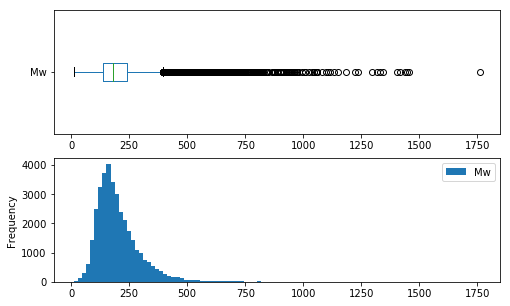

In [22]:
#molecular weight distributions

fig, (ax, ax2) = plt.subplots(nrows=2, figsize=(8,5))

df_el_filt_mw_filt3.plot(kind='box', ax=ax, vert=False)
df_el_filt_mw_filt3.plot(kind='hist',bins=100, ax=ax2)

plt.show()

#The final list contains a smooth distribution. The extreme outliers are now contained.
#most Mw's concentrate around 160.
#A skewed distribution.

In [23]:
df_el_filt_mw_filt3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36321 entries, 100-00-5 to 999-90-6
Data columns (total 4 columns):
Name        36321 non-null object
Formula     36321 non-null object
Elements    36321 non-null object
Mw          36321 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [24]:
df_el_filt_mw_filt3.describe()

,Mw
count,36321.000000
mean,203.490409
std,101.626605
min,12.000000
25%,139.038176
50%,180.187801
75%,242.260966
max,1760.733644


<b> 2) Classify isomers/allotropes (i.e., the same chemical formula, but different chemical structure, and hence have different chemical names) </b>  
-The final DataFrame contains duplicated chemical formulae, as well as duplicated chemicals names; however, the CAS numbers are unique.


In [25]:
#Get entries with duplicated chemical formulae
df_el_filt_mw_filt3[df_el_filt_mw_filt3.Formula.duplicated(keep=False)].sort_values('Formula').head(10)


,Name,Formula,Elements,Mw
CAS,,,,
68322-97-4,BrBrO,Br2O,"[Br, O]",173.831590
21308-80-5,BrOBr,Br2O,"[Br, O]",173.831590
13172-31-1,Disulfur dibromide,Br2S2,"[Br, S]",221.780818
71677-14-0,SSBr2,Br2S2,"[Br, S]",221.780818
151920-98-8,ClBrO,BrClO,"[Br, Cl, O]",129.882105
151920-97-7,BrClO,BrClO,"[Br, Cl, O]",129.882105
13536-70-4,BrNO2,BrNO2,"[Br, N, O]",124.911241
96607-02-2,t-BrONO,BrNO2,"[Br, N, O]",124.911241
67177-47-3,BrOO,BrO2,"[Br, O]",110.908167


In [26]:
#get entries with duplicated chemical names
df_el_filt_mw_filt3[df_el_filt_mw_filt3.Name.duplicated(keep=False)].sort_values('Name').head(10)


,Name,Formula,Elements,Mw
CAS,,,,
26655-34-5,&#945;-D-Glucose,C6H12O6,"[C, H, O]",180.063388
492-62-6,&#945;-D-Glucose,C6H12O6,"[C, H, O]",180.063388
5989-81-1,&#945;-Lactose monohydrate,C12H22O11.H2O,"[C, H, O, H, O]",360.126776
10639-26-6,&#945;-Lactose monohydrate,C12H22O11.H2O,"[C, H, O, H, O]",360.126776
10208-80-7,&#945;-Muurolene,C15H24,"[C, H]",204.187801
31983-22-9,&#945;-Muurolene,C15H24,"[C, H]",204.187801
124191-33-9,&#945;-n-Propyldecalin,C13H24,"[C, H]",180.187801
91972-45-1,&#945;-n-Propyldecalin,C13H24,"[C, H]",180.187801
2268-32-8,(E)-1-Chloro-2-fluoroethene,C2H2ClF,"[C, H, Cl, F]",79.982906


In [27]:
#check to ensure that the CAS numbers are unique
print('Number of compounds in the final DataFrame:', len(df_el_filt_mw_filt3))
print('Number of compounds with unique CAS number in the final DataFrame:', len(set(df_el_filt_mw_filt3.index)))

Number of compounds in the final DataFrame: 36321
Number of compounds with unique CAS number in the final DataFrame: 36321


Since the two numbers are equal, it is concluded that the compounds in the final DataFrame have unique CAS numbers.

<b> 3) Save the final list to csv </b>

In [28]:
df_el_filt_mw_filt3.to_csv('NIST_chemicals_list_organic.csv')

### V. Conclusions

The following main data wrangling steps have been undertaken:
- Shortened the NIST chemical list from 72,618 to 36,416
- All rows that contain null entries in any of the three columns are deleted
- Only the list of compounds that are non ions, non radicals, and non-polymeric are retained
- Only the list of organic compounds containing the following elements: C, H, O, N, S, P, F, Cl, Br, and I are retained
- Each entry in the final DataFrame has a unique CAS number, but there are duplicate names and isomers and allotropes
- The shortened DataFrame has been exported into a csv file called NIST_chemicals_list_organic
- The information within this final DataFrame will be used to download the IR spectra from the NIST database (http://webbook.nist.gov/chemistry/vib-ser/)
- The IR spectra will be analyzed for its spectral features to aid in automating the IR spectrum interpretation routine of an unknown compound 